In [95]:
import os
import pandas
import numpy as np
import torch
import matplotlib.pyplot as plt
import hcpdatautils as hcp

In [2]:
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [3]:
model_dir = 'E:\\Ising_model_results_daai'

In [51]:
# sim_observeables_file = os.path.join(model_dir, 'observed_values_simple_euler_from_expected_group_training_threshold_median_parallel_10000_updates_10000_sim_length_1200_learning_rate_0.001_beta_0.0122000000000000007743805596760466869.pt')
sim_observeables_file = os.path.join(model_dir, 'observed_values_simple_euler_from_expected_group_training_threshold_median_parallel_10000_updates_1000_sim_length_12000_learning_rate_0.01_beta_0.0122000000000000007743805596760466869.pt')
# sim_observeables_file = os.path.join(model_dir, 'observed_values_simple_euler_from_expected_group_training_threshold_median_parallel_10000_updates_1000_sim_length_1200_learning_rate_0.1_beta_0.0122000000000000007743805596760466869.pt')
sim_observables = torch.load(sim_observeables_file)
print( sim_observables.size() )

torch.Size([64980])


In [52]:
data_observables_file = os.path.join(model_dir, 'observable_expected_values_group_training_threshold_median.pt')
data_observables = torch.load(data_observables_file)
print( data_observables.size() )

torch.Size([64980])


In [53]:
num_nodes = 360
sim_means = sim_observables[:num_nodes]
sim_product_means = sim_observables[num_nodes:]
sim_product_means_mat = torch.zeros( (num_nodes, num_nodes), dtype=float_type, device=device )
triu_indices = torch.triu_indices(num_nodes, num_nodes, offset=1, dtype=int_type, device=device)
triu_rows = triu_indices[0]
triu_cols = triu_indices[1]
sim_product_means_mat[triu_rows,triu_cols] = sim_product_means
sim_product_means_mat[triu_cols,triu_rows] = sim_product_means
data_means = data_observables[:num_nodes]
data_product_means = data_observables[num_nodes:]
data_product_means_mat = torch.zeros( (num_nodes, num_nodes), dtype=float_type, device=device )
data_product_means_mat[triu_rows,triu_cols] = data_product_means
data_product_means_mat[triu_cols,triu_rows] = data_product_means

Text(0.5, 1.0, 'data mean observables')

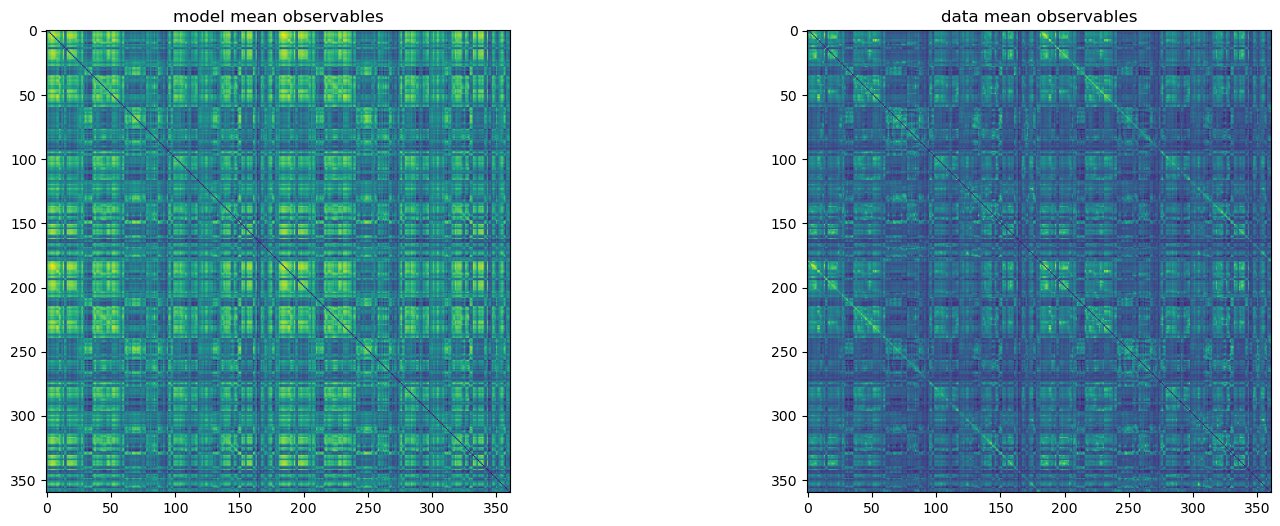

In [54]:
fig, axs = plt.subplots( nrows=1, ncols=2, figsize=(18, 6) )
sim_observables_block = torch.cat( (sim_means[:,None], sim_product_means_mat), dim=1 )
axs[0].imshow( sim_observables_block.detach().cpu().numpy() )
axs[0].set_title('model mean observables')
data_observables_block = torch.cat( (data_means[:,None], data_product_means_mat), dim=1 )
axs[1].imshow( data_observables_block.detach().cpu().numpy() )
axs[1].set_title('data mean observables')

In [55]:
def make_histogram(name:str, values:torch.Tensor):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    axs.hist( values.flatten().detach().cpu().numpy() )
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    axs.set_xlabel(name)
    axs.set_ylabel('count in bin')
    axs.set_title(f'distribution of {name}')
    plt.show()

In [56]:
def print_stats(name:str, values:torch.Tensor):
    values = values.flatten()
    quantile_cutoffs = torch.tensor([0.025, 0.5, 0.975], dtype=float_type, device=device)
    quantiles = torch.quantile(values, quantile_cutoffs)
    min_val = torch.min(values)
    max_val = torch.max(values)
    print(f'The distribution of {name} values has median {quantiles[1].item():.3g} with 95% CI [{quantiles[0].item():.3g}, {quantiles[2].item():.3g}] and range [{min_val.item():.3g}, {max_val.item():.3g}].')

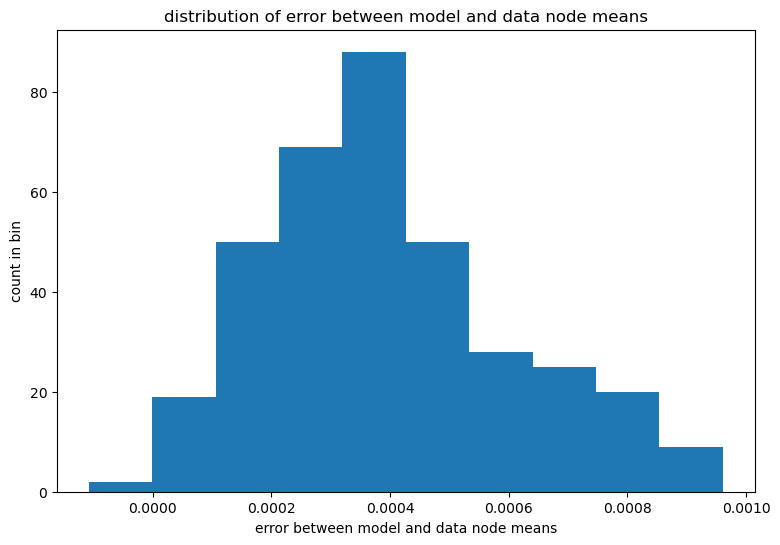

The distribution of error between model and data node means values has median 0.000376 with 95% CI [4.66e-05, 0.000852] and range [-0.000108, 0.000961].


In [57]:
errors_of_means = sim_means - data_means
name = 'error between model and data node means'
values = errors_of_means
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

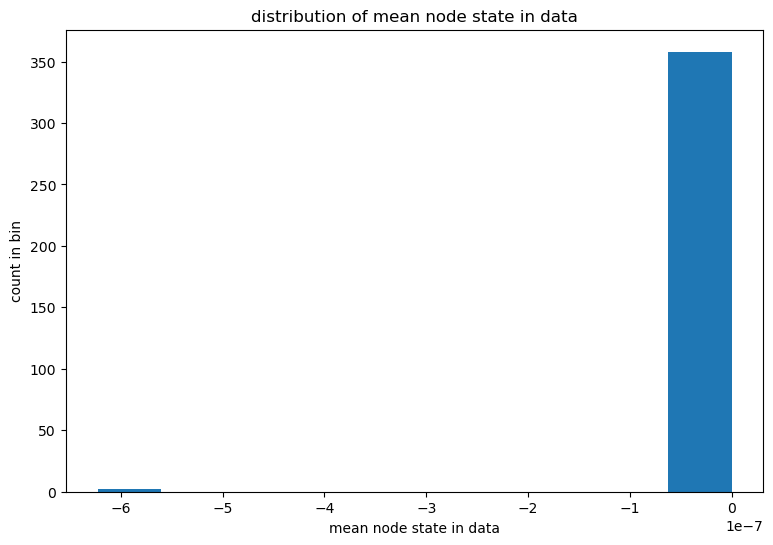

The distribution of mean node state in data values has median 0 with 95% CI [0, 0] and range [-6.23e-07, 0].


In [58]:
name = 'mean node state in data'
values = data_means
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

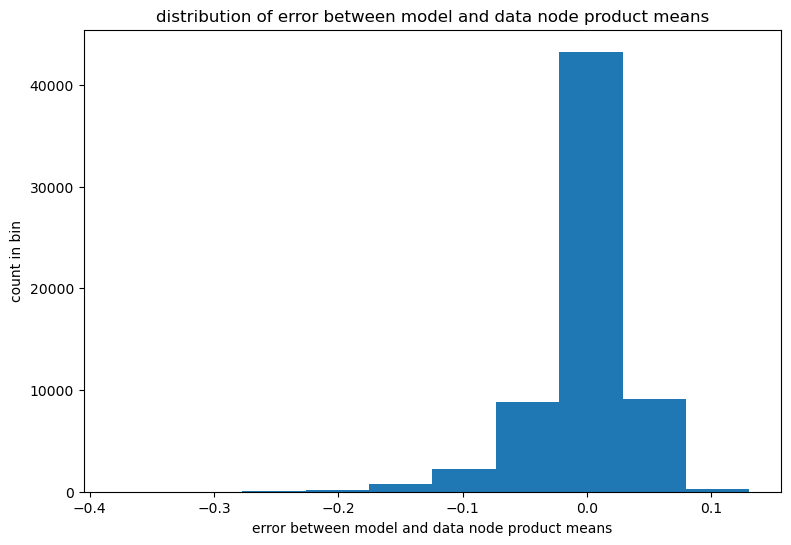

The distribution of error between model and data node product means values has median 0.00289 with 95% CI [-0.102, 0.0558] and range [-0.379, 0.131].


In [59]:
errors_of_product_means = sim_product_means - data_product_means
name = 'error between model and data node product means'
values = errors_of_product_means
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

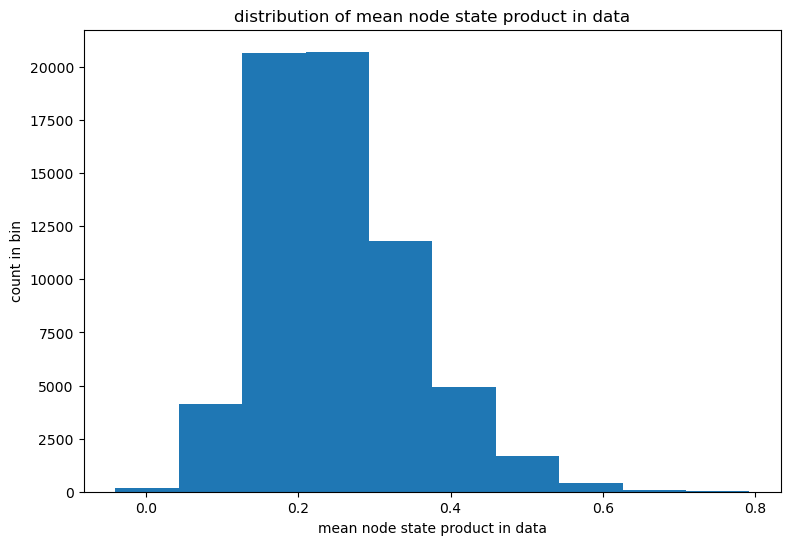

The distribution of mean node state product in data values has median 0.235 with 95% CI [0.0973, 0.477] and range [-0.0407, 0.793].


In [60]:
name = 'mean node state product in data'
values = data_product_means
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

In [61]:
# params_file = os.path.join(model_dir, 'params_simple_euler_from_expected_group_training_threshold_median_parallel_10000_updates_10000_sim_length_1200_learning_rate_0.001_beta_0.0122000000000000007743805596760466869.pt')
params_file = os.path.join(model_dir, 'params_simple_euler_from_expected_group_training_threshold_median_parallel_10000_updates_1000_sim_length_12000_learning_rate_0.01_beta_0.0122000000000000007743805596760466869.pt')
# params_file = os.path.join(model_dir, 'params_simple_euler_from_expected_group_training_threshold_median_parallel_10000_updates_1000_sim_length_1200_learning_rate_0.1_beta_0.0122000000000000007743805596760466869.pt')
params = torch.load(params_file)
print( params.size() )

torch.Size([64980])


In [62]:
num_nodes = 360
h = params[:num_nodes]
J_triu = params[num_nodes:]
J = torch.zeros( (num_nodes, num_nodes), dtype=float_type, device=device )
triu_indices = torch.triu_indices(num_nodes, num_nodes, offset=1, dtype=int_type, device=device)
triu_rows = triu_indices[0]
triu_cols = triu_indices[1]
J[triu_rows,triu_cols] = J_triu
J[triu_cols,triu_rows] = J_triu

Text(0.5, 1.0, 'data mean observables')

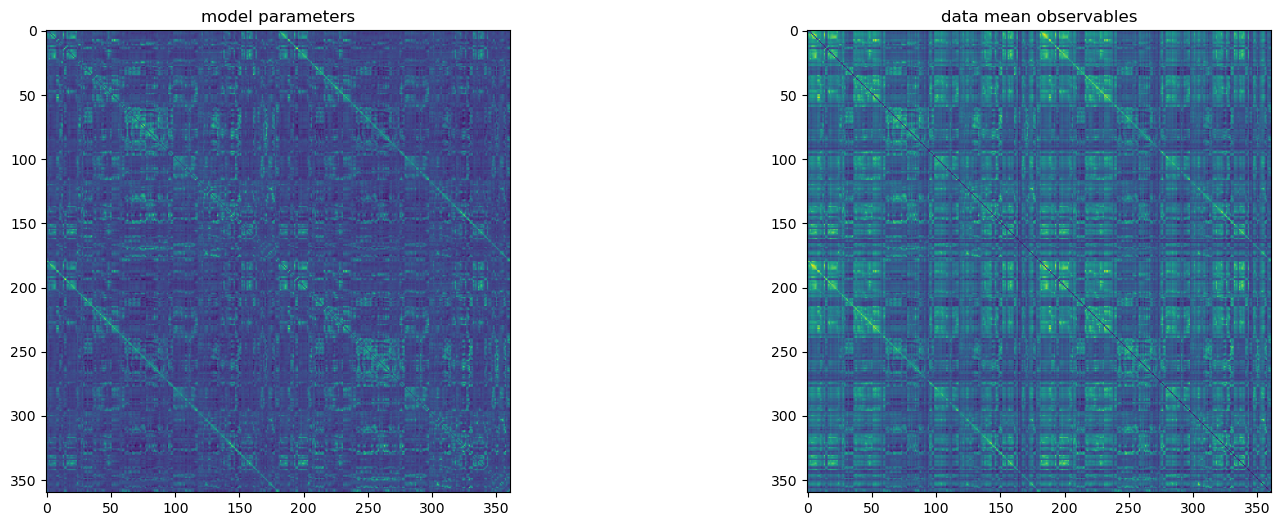

In [63]:
fig, axs = plt.subplots( nrows=1, ncols=2, figsize=(18, 6) )
params_block = torch.cat( (h[:,None], J), dim=1 )
axs[0].imshow( params_block.detach().cpu().numpy() )
axs[0].set_title('model parameters')
data_observables_block = torch.cat( (data_means[:,None], data_product_means_mat), dim=1 )
axs[1].imshow( data_observables_block.detach().cpu().numpy() )
axs[1].set_title('data mean observables')

In [66]:
print(num_nodes)
num_params = num_nodes + num_nodes * (num_nodes - 1)//2
print(num_params)

360
64980
56


In [98]:
subject_ids = hcp.load_subject_subset(directory_path='E:\\HCP_data', subject_subset='all', require_sc=True)
print( 'num subjects:', len(subject_ids) )
for subject_id in subject_ids:
    if (subject_id <= 99999) or (subject_id > 999999):
        print(subject_id, 'does not have 6 digits')

num subjects: 837
